# Learning outcomes
1. image histogram: distribution grayscale values
2. enhance constrast: scalar multiplication on image, histogram equalization and its variant called CLAHE
3. Thresholding: global thresholding and otsu thresholding
4. Morphological operations(binary image)
5. Color spaces: HSV color space used to perform color based segmentation

In [17]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from util_func import *
# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

In [4]:
img = cv.imread("images/lena.jfif")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [17]:
#2 ways to compute histogram
#256 bin
%timeit hist = cv.calcHist([gray],[0],None,[256],[0,256])
%timeit hist, _ = np.histogram(gray.flatten(),256)

43.7 µs ± 1.41 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.38 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


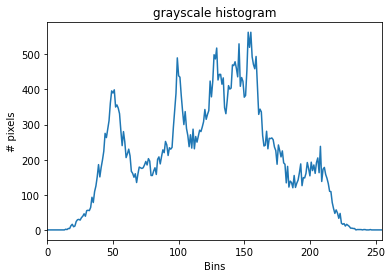

In [21]:
hist = cv.calcHist([gray],[0],None,[256],[0,256])

plt.figure()
plt.title("grayscale histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.plot(hist)
plt.xlim([0,255])
plt.show()

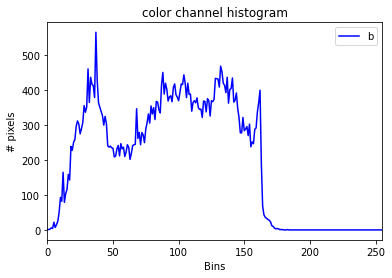

In [15]:
# get the histogram for every channel
channels = cv.split(img)
colors= ("b","g","r")

plt.figure()
plt.title("color channel histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")

for (ch,color) in zip(channels, colors):
    hist = cv.calcHist([ch],[0],None,[256],[0,256])
    plt.plot(hist,color=color,label=color)
    
plt.xlim([0,255])
plt.legend()
plt.show()

In [5]:
img = cv.imread("images/low_contrast_img.jfif",0)
show_img("low contrast",img)

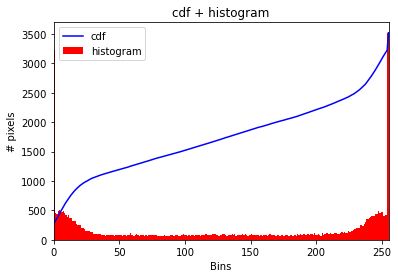

In [20]:
hist = cv.calcHist([img],[0],None,[256],[0,256])


cdf = hist.cumsum()
cdf_norm = cdf * hist.max()/cdf.max()

plt.figure()
plt.plot(cdf_norm, color="b")
plt.hist(img.flatten(),256,color="r")
plt.title("cdf + histogram")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.legend(("cdf","histogram"))
plt.xlim([0,255])
plt.show()

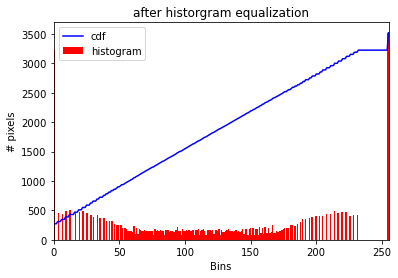

In [16]:
#histogram equalization
eq = cv.equalizeHist(img)

hist = cv.calcHist([eq], [0], None, [256], [0, 256])

cdf = hist.cumsum()
cdf_norm = cdf * hist.max()/cdf.max()

plt.figure()
plt.plot(cdf_norm, color="b")
plt.hist(eq.flatten(),256,color="r")
plt.title("after historgram equalization")
plt.xlabel("Bins")
plt.ylabel("# pixels")
plt.legend(("cdf","histogram"))
plt.xlim([0,255])
plt.show()

In [7]:
#CLAHE
img = cv.imread("images/dog1.jfif",0)

#equalization
eq = cv.equalizeHist(img)

#CLAHE
clahe = cv.createCLAHE(clipLimit = 3, tileGridSize = (8,8))
dst = clahe.apply(img)

cv.imshow('original', img)
cv.imshow('clahe', dst)
cv.imshow('he_image', eq)

cv.waitKey(0)
cv.destroyAllWindows()

In [8]:
img = cv.imread("images/winter.jfif",0)


# Thresholding

In [9]:
#simple global thresholding
# different types of thresholding

[i for i in dir(cv) if i.startswith("THRESH")]


['THRESH_BINARY',
 'THRESH_BINARY_INV',
 'THRESH_MASK',
 'THRESH_OTSU',
 'THRESH_TOZERO',
 'THRESH_TOZERO_INV',
 'THRESH_TRIANGLE',
 'THRESH_TRUNC']

In [10]:
#do not change the 256
img = np.fromfunction(lambda i,j: j,(50,256), dtype=np.uint8)

def trackbar(x):
    _,img1 = cv.threshold(img,x,255,cv.THRESH_BINARY)
    _,img2 = cv.threshold(img,x,255,cv.THRESH_BINARY_INV)
    _,img3 = cv.threshold(img,x,255,cv.THRESH_TRUNC)
    _,img4 = cv.threshold(img,x,255,cv.THRESH_TOZERO)
    _,img5 = cv.threshold(img,x,255,cv.THRESH_TOZERO_INV)

    cv.imshow("window",np.vstack((img1,img2,img3,img4,img5)))
    
cv.namedWindow("window")
cv.createTrackbar("threshold","window",100,255,trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

## Simple global threshold vs Otsu threshold

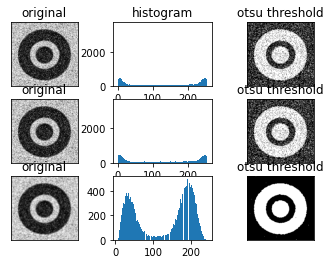

In [23]:
#apply 3 approaches: 1. global threshold, 2 otsu threshold, 3 blurring + otsu
img = cv.imread('images/noisy.jfif', 0)

#1
# g(x,y) (0,255)
th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)[1]

#2
th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

#3
blur = cv.GaussianBlur(img,(5,5),0)
th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

imgs = [img,0,th1,
       img,0,th2,
       blur,0,th3]

titles = ("original","histogram","global threshold",
         "original","","otsu threshold",
         "blur","","otsu threshold")

for i in range(3):
    plt.subplot(3,3,3*i+1), plt_img(imgs[3*i],title = titles[3*1])
    plt.subplot(3,3,3*i+2), plt.hist(imgs[3*i].flatten(), 256)
    plt.title(titles[3*i+1])
    plt.subplot(3,3,3*i+3), plt_img(imgs[3*i+2],title = titles[3*1+2])
                                   
plt.show()

# Morphological operations

In [24]:
# kernel
kernel = np.ones((5,5), dtype=np.uint8)

#erosion
erosion = cv.erode(th3, kernel, iterations=1)

#combined
img_combined = np.hstack((th3, erosion))

show_img("erosion",img_combined)

In [28]:
#trackbar: function and while loop
def nothing(x):
    pass

wn = "window"
cv.namedWindow(wn)
cv.createTrackbar("size",wn,3,10,nothing)
cv.createTrackbar("iter",wn,3,10,nothing)

while(1):
    #retrieve the size and #iteration
    size = cv.getTrackbarPos("size", wn)
    if size<3:
        size = 3
        
    iteration = cv.getTrackbarPos("iter",wn)
    if iteration<1:
        iteration = 1
        
    kernel = np.ones((size,size),dtype = np.uint8)
    #closing
    closing = cv.morphologyEx(th3,cv.MORPH_CLOSE,kernel,iterations = iteration)
    
    cv.imshow(wn, closing)
    
    k = cv.waitKey(1) &0xFF
    if k == 27:
        break
        
cv.destroyAllWindows()

In [27]:
cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

# Color spaces
- RGB/BGR (prevalent image formats)
- HSV (hue,saturation, value)
 * hue encodes color (angular, 0-360). In OpenCV, 0-179
 * saturation implies color purity
 * value: brightness. 0 is dark.
 
- L\*a\*b:
    - L denotes brightness/luminance while a and b are color channels
    - perceptual uniformity
    

In [31]:
#sharpen
img = cv.imread("images/lena.jfif")

img_lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)

l,a,b = cv.split(img_lab)

#process just the l channel
#sharpen

kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
l_sharpen = cv.filter2D(l,-1,kernel)

#merge
sharpen = cv.merge((l_sharpen,a,b))

#change to bgr
sharpen = cv.cvtColor(sharpen,cv.COLOR_Lab2BGR)


cv.imshow("original",img)
show_img("sharpen",sharpen)

## Demo on color based segmentation

In [32]:
img = cv.imread("images/color_space/pant.jfif")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

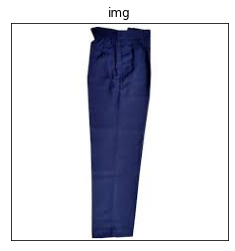

In [33]:
plt_img(img,"img")

In [21]:
# import dependencies
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

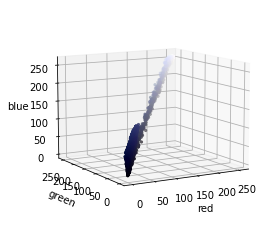

In [35]:
# split the image into separate channels
r,g,b = cv.split(img)

# set up 3D figure
fig = plt.figure()
axis = fig.add_subplot(1,1,1,projection="3d")

#pixel colors ready as argument for scatter plot
pixel_colors = img.reshape((-1,3))
norm = colors.Normalize()
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.ravel(),g.ravel(),b.ravel(),
            facecolors = pixel_colors, marker=".")
axis.view_init(elev=10,azim=240)
axis.set_xlabel("red")
axis.set_ylabel("green")
axis.set_zlabel("blue")
plt.show()

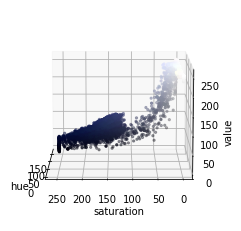

In [37]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

# split the image into separate channels
h,s,v = cv.split(img_hsv)

# set up 3D figure
fig = plt.figure()
axis = fig.add_subplot(1,1,1,projection="3d")

axis.scatter(h.ravel(),s.ravel(),v.ravel(),
            facecolors = pixel_colors, marker=".")
axis.view_init(elev=10,azim=180)
axis.set_xlabel("hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()

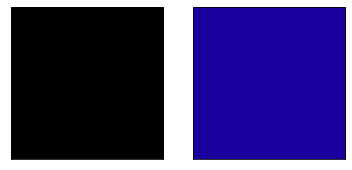

In [39]:
blue_low = (85,90,0)
blue_high = (125,255,160)

square1 = np.full((10,10,3), blue_low, dtype=np.uint8)
square2 = np.full((10,10,3), blue_high, dtype=np.uint8)

plt.subplot(121), plt_img(cv.cvtColor(square1, cv.COLOR_HSV2RGB))
plt.subplot(122), plt_img(cv.cvtColor(square2, cv.COLOR_HSV2RGB))
plt.show()

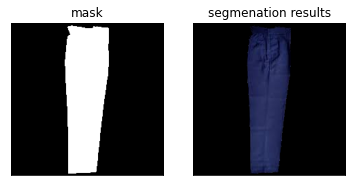

In [41]:
# color based segmentation
mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask=mask)

plt.subplot(121), plt_img(mask, title="mask")
plt.subplot(122), plt_img(res, title="segmenation results")
plt.show()

# Exercise

In [51]:
def color_seg(img,color_low, color_high, smooth = True):
    '''Args:
    img: source image
    color_low and color_high are tuple of colors
    smooth is boolean (blurring or not)'''
    
    ori_img = img.copy()
    if smooth:
        img = cv.GaussianBlur(img,(5,5),0)
    
    #change from RGB to HSV
    img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    
    #mask
    mask = cv.inRange(img_hsv, color_low, color_high)
    mask = cv.erode(mask,None, iterations = 2)
    mask = cv.dilate(mask,None,iterations = 2)
    
    return cv.bitwise_and(ori_img, ori_img, mask = mask)

imgs = []

for i in range(1,6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/pant{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)
    
#perform color segmentation
res = [color_seg(im, blue_low, blue_high) for im in imgs]

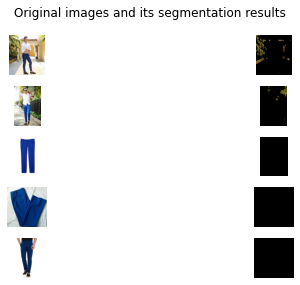

In [52]:
fig, ax = plt.subplots(5,2, figsize=(10,4))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")

fig.suptitle("Original images and its segmentation results")
plt.tight_layout()
plt.show()

# Weekly Exercise 

# Exercise 1

In [10]:
image = cv.imread('images/boat.jpg')
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

# Apply Otsu thresholding
_,thresholded = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)

# Find contours in the thresholded image
contours, _ = cv.findContours(thresholded, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Find largest contour
largest = max(contours, key=cv.contourArea)

x, y, w, h = cv.boundingRect(largest)
cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the results
cv.imshow('Original Image', image)
cv.imshow('Thresholded Image', thresholded)
cv.imshow('Image with Bounding Boxes', image)
cv.waitKey(0)
cv.destroyAllWindows()

# Exercise 2

In [13]:
# Load input image
image_path = 'images/leaf.jfif'
image = cv.imread(image_path, cv.IMREAD_COLOR)

# Convert image to grayscale
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

# Apply thresholdedholding to segment the leaf from the background
_, thresholded = cv.threshold(gray, 128, 255, cv.THRESH_BINARY_INV)

# Create a trackbar function
def trackbar (x):
    if x == 0: # make the minimum value of the trackbar starts from 1
        return
    
    # used in Morphological operations to define the shape and size of the neighbourhood around each pixel
    kernel_size = (x, x)  # Square structuring element with size x
    kernel = cv.getStructuringElement(cv.MORPH_RECT, kernel_size)
    
    erosion = cv.erode(thresholded, kernel, iterations = 1)
    dilation = cv.dilate(thresholded, kernel, iterations = 1)
    opening = cv.morphologyEx(thresholded, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(thresholded, cv.MORPH_CLOSE, kernel)
    
    result = np.hstack((erosion, dilation, opening, closing))
    cv.imshow("window", result)
    
# Create a window and a trackbar
cv.namedWindow("window")
cv.createTrackbar("kernel size", "window", 1, 20, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

# Exercise 3

In [28]:
image = cv.imread("images/color_space/porcelain1.jfif")
img = cv.cvtColor(image, cv.COLOR_BGR2RGB)

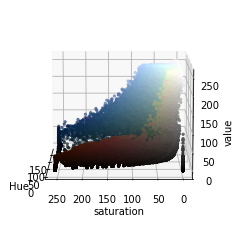

In [30]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)

#set up 3D figure
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

# pixel colors ready as argument for scatter plot
pixel_colors = img.reshape((-1, 3))
norm = colors.Normalize()
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.ravel(), s.ravel(), v.ravel(),
            facecolors = pixel_colors, marker=".")
axis.view_init(elev=10, azim=180)
axis.set_xlabel("Hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()

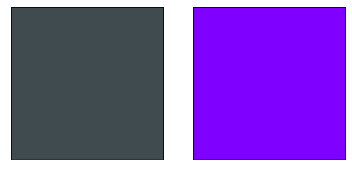

In [31]:
# Define lower and upper bounds for blue color in HSV
blue_low = (100, 50, 80)
blue_high = (135, 255, 255)

square1 = np.full((10, 10, 3), blue_low, dtype = np.uint8)
square2 = np.full((10, 10, 3), blue_high, dtype = np.uint8)

plt.subplot(121), plt_img(cv.cvtColor(square1, cv.COLOR_HSV2RGB))
plt.subplot(122), plt_img(cv.cvtColor(square2, cv.COLOR_HSV2RGB))
plt.show()

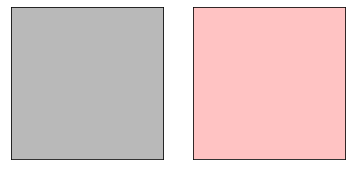

In [32]:
# Define lower and upper bounds for white color in HSV
white_low = (0, 0, 185)
white_high = (180, 60, 255)

square1 = np.full((10, 10, 3), white_low, dtype = np.uint8)
square2 = np.full((10, 10, 3), white_high, dtype = np.uint8)

plt.subplot(121), plt_img(cv.cvtColor(square1, cv.COLOR_HSV2RGB))
plt.subplot(122), plt_img(cv.cvtColor(square2, cv.COLOR_HSV2RGB))
plt.show()

In [33]:
def color_segmentation(img, color_low, color_high, color_low_1, color_high_1, smooth = True):
    """Args:
    img: source image
    color_low and color_high are tuple of colors
    smooth is boolean (blurring or not)
    """
    
    ori_img = img.copy()
    if smooth:
        #img = cv.GaussianBlur(img, (5, 5), 0)
        
        #change from RGB to HSV
        img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
        
        #mask
        mask_1 = cv.inRange(img_hsv, color_low, color_high)
        
        mask_2 = cv.inRange(img_hsv, color_low_1, color_high_1)
        
        # Combine the masks using logical OR
        combine = cv.bitwise_or(mask_1, mask_2)
        
        return cv.bitwise_and(ori_img, ori_img, mask = combine)


In [34]:
# img list
imgs = []

for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"images/color_space/porcelain{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)
    
# Perform color segmentation
res = [color_segmentation(im, blue_low_1, blue_high_1, white_low_1, white_high_1) for im in imgs]

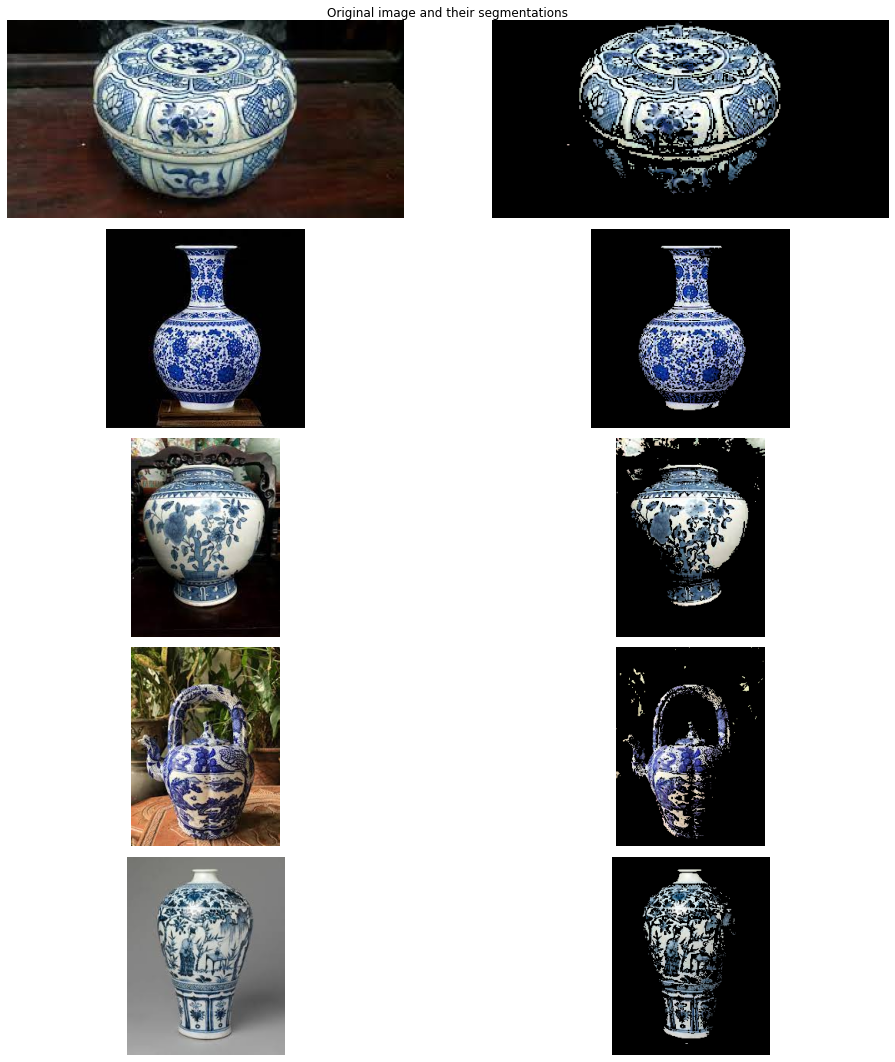

In [35]:
fig, ax = plt.subplots(5, 2, figsize = (15, 15))

for i in range(5):
    ax[i][0].imshow(imgs_1[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")
    
fig.suptitle("Original image and their segmentations")
plt.tight_layout()
plt.show()